# Evolution of the eutrophication in the Bay of Bengal

### Author: **Md Rony Golder**, Research Assistant, Fisheries and Marine Resource Technology Discipline, Khulna University, Khulna

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Cell" and select "Run All Above Selected Cell".<br>
***

## Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

First, the notebook must be set up with all the necessary tools available from the Jupyter Notebook Ecosystem.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly librairy to manipulate NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |

#### Import libraries ####

In [1]:
# Import libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

## Set up OPeNDAP

In the first notebook, we have seen that the Copernicus Marine Service Products could be used directly, without having to download any file, thanks to the OPeNDAP service. A specific Python script has been developped for this workshop and will give you access to the Copernicus Marine Service products. To use it, run the following cell and enter your credentials. 

In the following sections, you will be able to use the products either from the files which have already been downloaded, or thanks to OPeNDAP service, depending on what you prefer ! 

In [1]:
%run opendap_config.py

Enter your Copernicus Marine Service username: mgolder
Enter your password: ········


## Presentation of the product used

In this notebook, we are going  to use the Global Biogeochemistry Reanalysis model, with the **monthly means** of the biogeochemical parameters from **1993 to 2020**. Reanalysis models combine the advantages of a model simulation constrained by existing measurements. Here is a brief overview of the product's characteristics:


| Parameter | Value |
| :---: | :---|
| **Variables used** | o2 *(oxygen concentration)*, chl *(concentration of chlorophyll)*, no4 *(concentration of Nitrate)* |
| **Product identifier** |[cmems_mod_glo_bgc_my_0.25_P1M-m_1653111433679](hhttps://resources.marine.copernicus.eu/product-detail/GLOBAL_MULTIYEAR_BGC_001_029/INFORMATION) |
| **Spatial resolution** | 4km x 4km |
| **Temporal resolution** | monthly mean |
| **Temporal coverage** | from 1993-01-01 to 2020-12-31 |
| **Vertical coverage** |from -700m to 0m |

# Analyse the evolution of the Bay of Bengal parameters 

We are now all set to begin our study of the eutrophication of the Bay of Bengal. In this first section, we are going to analyse the evolution of the eutrophication through the evolution of the nutrient input (Nitrate concentration), the algae blooms (Chlorophyll concentration), and sea hypoxia (Oxygen concentration) in the Bay of Bengal. 

## Load the product

As we have seen before, you have two options to load the product : you can either use the files that have been downloaded and stored in the `data/` folder, or use the OPeNDAP service. 

We are going to load two files : the first one, under the Python variable `chl_N_O` contains the surface parameters (nitrate, chlorophyll and oxygen) from 1993 to 2020, whereas the second one `o2` contains the oxygen concentration of all the depths and from 1993 to 2020. 

In the following cell, you can comment/uncomment the lines and select the option you prefer. You can then check the dataset coordinates and variables and make sure that both methods output the same information.

In [2]:
# Open the datasets with OPeNDAP
#chl_N_O = xr.open_dataset('https://my.cmems-du.eu/thredds/dodsC/dataset-reanalysis-scobi-monthlymeans').sel(depth=0,method='nearest')[['chl','no3','o2']]
#o2 = xr.open_dataset('https://my.cmems-du.eu/thredds/dodsC/dataset-reanalysis-scobi-monthlymeans')[['o2']]

# Open the datasets
chl_N_O = xr.open_dataset('data/chl_N_O.nc')
o2 = xr.open_dataset('data/o2_all_depths.nc')

In [3]:
# check what the dataset contains
chl_N_O

<xarray.Dataset>
Dimensions:    (time: 336, depth: 1, latitude: 81, longitude: 81)
Coordinates:
  * depth      (depth) float32 0.5058
  * latitude   (latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 99.5 99.75 100.0
Data variables:
    no3        (time, depth, latitude, longitude) float32 ...
    o2         (time, depth, latitude, longitude) float32 ...
    chl        (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Monthly mean fields for product GLOBAL_REA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-monthly
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

## Calculate the regional average of the parameters

We will calculate the average value of each of the surface Nitrate, Chlorophyll and Oxygen concentrations over the whole Bay of Bengal region (average on the longitude and latitude coordinates). .

In [4]:
# Calculate the average parameters
chl_N_O_average = chl_N_O.mean('latitude').mean('longitude')

# Check the results
chl_N_O_average

<xarray.Dataset>
Dimensions:  (time: 336, depth: 1)
Coordinates:
  * depth    (depth) float32 0.5058
  * time     (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-12-16T12:00:00
Data variables:
    no3      (time, depth) float32 0.9356 0.643 0.5778 ... 2.163 2.111 1.315
    o2       (time, depth) float32 208.7 208.9 207.2 204.5 ... 202.6 203.9 205.1
    chl      (time, depth) float32 0.2082 0.175 0.1492 ... 0.2453 0.1998 0.199

## Plot the evolution of the parameters

Let's plot the evolution of the parameters over time, with the 28 years available in the product.

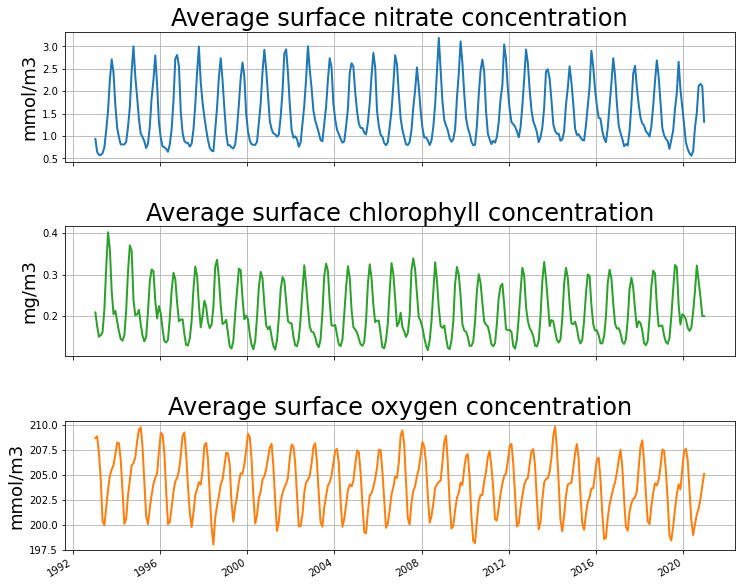

In [5]:
# Define the characteristics of the plot  
f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)
f.subplots_adjust(top=0.8,bottom=0.05,hspace = 0.5)

# First plot : Nitrate
ax1.set_title("Average surface nitrate concentration",fontsize=24)
ax1.grid()
ax1.set_ylabel("mmol/m3",fontsize=18)
ax1.plot(chl_N_O_average.time,chl_N_O_average.no3,c='tab:blue',linewidth=2)
f.autofmt_xdate()

# Second plot : Chlorophyll
ax2.set_title("Average surface chlorophyll concentration",fontsize=24)
ax2.grid()
ax2.set_ylabel("mg/m3",fontsize=18)
ax2.plot(chl_N_O_average.time,chl_N_O_average.chl,c='tab:green',linewidth=2)

# Third plot : Oxygen
ax3.set_title("Average surface oxygen concentration",fontsize=24)
ax3.grid()
ax3.set_ylabel("mmol/m3",fontsize=18)
ax3.plot(chl_N_O_average.time,chl_N_O_average.o2,c='tab:orange',linewidth=2)

The above figure shows the variations of the Global biogeochemical parameters from 1993 to 2020. We can already see some trends : the nitrate and chlorophyll surface concentrations seem to be decreasing over the years, whereas the oxygen surface concentration seems to be stable.

## Calculate the yearly average


The previous plots have used the spatially averaged monthly values of the parameters and we displayed their seasonal variations as well as the interannual ones. In the next cell, we are going to calculate the annual values with the [`xarray.groupby` method](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.groupby.html). We will therefore be able to focus the analysis on the interannual variations of the sea parameters. 

In [6]:
# Group the data by year and calculate the average for each year 
chl_N_O_average_annual = chl_N_O_average.groupby('time.year').mean('time')

# Check the results
chl_N_O_average_annual

<xarray.Dataset>
Dimensions:  (year: 28, depth: 1)
Coordinates:
  * depth    (depth) float32 0.5058
  * year     (year) int64 1993 1994 1995 1996 1997 ... 2016 2017 2018 2019 2020
Data variables:
    no3      (year, depth) float32 1.32 1.495 1.451 1.435 ... 1.578 1.388 1.256
    o2       (year, depth) float32 204.8 205.1 204.9 204.6 ... 204.1 203.2 203.2
    chl      (year, depth) float32 0.2347 0.2228 0.2166 ... 0.1999 0.2044 0.218

You can see from the previous cell output that the dataset does not have the `time` coordinate anymore, as it has been replaced with the `year` coordinate. The `o2` variable now contains the spatially and temporally averaged annual values of the parameters. 

## Plot the interannual variations of the parameters

Let's plot their evolution ! 

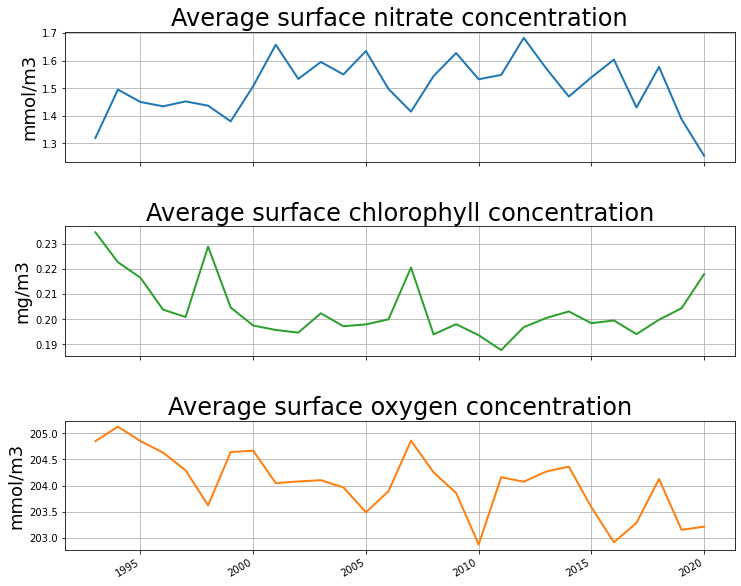

In [7]:
# Define the characteristics of the plot  
f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(311)
ax2 = f.add_subplot(312)
ax3 = f.add_subplot(313)
f.subplots_adjust(top=0.8,bottom=0.05,hspace = 0.5)

# First plot : Nitrate
ax1.set_title("Average surface nitrate concentration",fontsize=24)
ax1.grid()
ax1.set_ylabel("mmol/m3",fontsize=18)
ax1.plot(chl_N_O_average_annual.year,chl_N_O_average_annual.no3,c='tab:blue',linewidth=2)
f.autofmt_xdate()

# Second plot : Chlorophyll
ax2.set_title("Average surface chlorophyll concentration",fontsize=24)
ax2.grid()
ax2.set_ylabel("mg/m3",fontsize=18)
ax2.plot(chl_N_O_average_annual.year,chl_N_O_average_annual.chl,c='tab:green',linewidth=2)

# Third plot : Oxygen
ax3.set_title("Average surface oxygen concentration",fontsize=24)
ax3.grid()
ax3.set_ylabel("mmol/m3",fontsize=18)
ax3.plot(chl_N_O_average_annual.year,chl_N_O_average_annual.o2,c='tab:orange',linewidth=2)

## Analyse the results

# Monitor the hypoxia of the Bay of Bengal

In this section, we are going to study the oxygen concentration in the Bay of Bengal and provide an assessment of the hypoxia. As previously mentioned, the algae blooms prevent the light absorption in the deeper sea levels, which is one of the reasons for oxygen depletion mostly occuring near the sea floor. A conventional criterion for water to be considered hypoxic is a dissolved oxygen concentration lower than **2 mg of O2 / L** at the bottom of the sea floor (see [oceanservice.noaa.gov](https://oceanservice.noaa.gov/hazards/hypoxia/)). In the following sections, we are going to locate the regions which have suffered and still suffer from hypoxia depending on this criterion. 

## Convert the units

We are going to use the `o2` variable set before. This variable contains the oxygen concentrations for all the depths and dates included in the model.



In [8]:
# Check the products variables
o2

<xarray.Dataset>
Dimensions:    (time: 336, depth: 26, latitude: 81, longitude: 81)
Coordinates:
  * depth      (depth) float32 0.5058 1.556 2.668 3.856 ... 97.04 108.0 120.0
  * latitude   (latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 99.5 99.75 100.0
Data variables:
    o2         (time, depth, latitude, longitude) float32 ...
Attributes: (12/17)
    product:                       GLOBAL_REANALYSIS_BIO_001_029
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    title:                         Monthly mean fields for product GLOBAL_REA...
    area:                          GLOBAL
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    ...                            ...
    dataset:                       global-reanalysis-bio-001-029-monthly
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    comment:                       
    history:                       Data extracted from dataset http://localho...

You can see from the previous cell output that the unit of the oxygen concentration is **mmol/m3**. The threshold we are using to diagnose hypoxia is 2 **mg/L** at the bottom of the sea floor. In order to compare our dataset to this threshold, we are going to convert this the *mmol/m3* into *mg/L*. (Tips : the O2 molar mass is 32 g/mol)



In [9]:
# Convert the units 
o2 = o2 * 32 / 1000

## Study the vertical distribution of oxygen

First, let's have a look at the vertical distribution of the oxygen concentration. In the next cells we are setting the location of 4 points and one date, then selecting the model values at these locations and dates and finally plotting the vertical profiles. 

In [10]:
# Define the coordinates of the points to study
lon1, lat1 = 90.31 , 17.51
lon2, lat2 = 87.69 , 15.72
lon3, lat3 = 85.49, 12.31
lon4, lat4 = 88.50, 18.56

# Define the date to study
date = '2018-11-01T00'

# Select the product at this location and date and select the variable o2
o2_1 = o2.sel(longitude = lon1, latitude = lat1, time = date, method = 'nearest').o2
o2_2 = o2.sel(longitude = lon2, latitude = lat2, time = date, method = 'nearest').o2
o2_3 = o2.sel(longitude = lon3, latitude = lat3, time = date, method = 'nearest').o2
o2_4 = o2.sel(longitude = lon4, latitude = lat4, time = date, method = 'nearest').o2


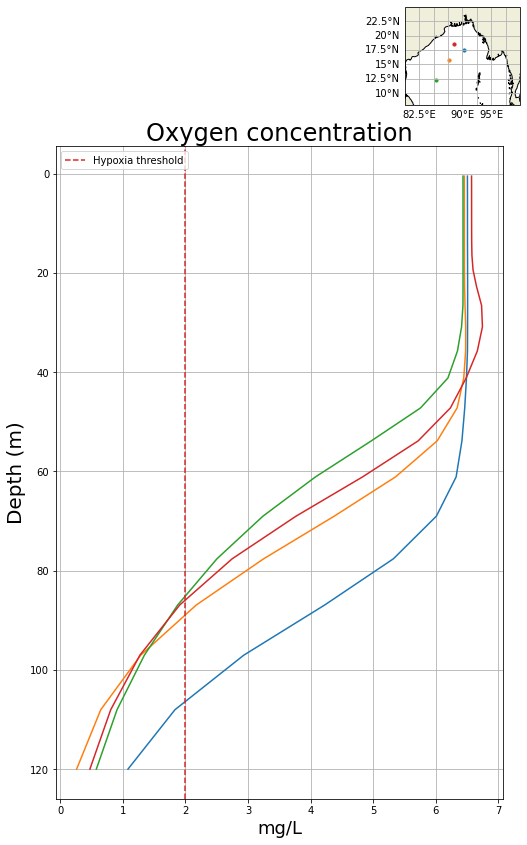

In [18]:
# Define the characteristics of the plot
f = plt.figure(figsize=(8,12)) # create a figure and define its size
ax = f.add_subplot(111) # create the axes of the plot
ax.grid() # add the grid lines
ax.set_title("Oxygen concentration",fontsize=24) # add the figure title
ax.invert_yaxis() # reverse the y axis
ax.set_xlabel("mg/L",fontsize=18) # set x axis label
ax.set_ylabel("Depth (m)",fontsize=20) # set y axis label 

# Plot the vertical profiles 
ax.plot(o2_1,o2_1['depth'],'tab:blue') 
ax.plot(o2_2,o2_2['depth'],'tab:orange') 
ax.plot(o2_3,o2_3['depth'],'tab:green') 
ax.plot(o2_4,o2_4['depth'],'tab:red') 

# Add the threshold value
ax.axvline(x = 2, ls='--',color = 'tab:red',label='Hypoxia threshold')

# Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.73, 0.91, 0.2, 0.15], projection=ccrs.PlateCarree()) # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True) # add the coastlines
gl.right_labels = False # remove latitude labels on the right
gl.top_labels = False # remove longitude labels on the top
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k') # add land mask 
ax_mini_map.set_extent([80, 100, 8, 25], crs=ccrs.PlateCarree()) # define the extent of the map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(lon1, lat1, 10,'tab:blue',transform=ccrs.PlateCarree()) # plot location of point 1
ax_mini_map.scatter(lon2, lat2, 10,'tab:orange',transform=ccrs.PlateCarree()) # plot location of point 2
ax_mini_map.scatter(lon3, lat3, 10,'tab:green',transform=ccrs.PlateCarree()) # plot location of point 3
ax_mini_map.scatter(lon4, lat4, 10,'tab:red',transform=ccrs.PlateCarree()) # plot location of point 4
ax.legend(loc="upper left") # add the legend                                           # add the legend

#Save figure
#plt.savefig('out/temp_vertical_profile.png')

The previous cell's output shows that the highest oxygen concentrations are located in the surface layer. 
There are several reasons for this distribution : 
- the oxygen dissolves into the ocean from the atmosphere at the surface ;
- the surface water is where oxygen is produced by phytoplankton through photosynthesis;
- the deeper water is too far from the surface for any atmospheric exchange, and there is not enough light to support photosynthesis;
- the oxygen is removed from the deeper water through the respiration of deep water organisms and the decomposition of organic material.

You can learn more about the sea oxygen concentration on this [article](https://rwu.pressbooks.pub/webboceanography/chapter/5-4-dissolved-gases-oxygen/)!



## Locate the hypoxic regions 

We are now going to locate the regions which suffer from hypoxia, our criteria still being the oxygen concentration on the sea floor. The previous vertical profiles have shown that the oxygen concentration was the lowest at the bottom of the sea. We are therefore going to select the minimum oxygen value in the water column, for each point of the region and for all date times. We will then select a date time and see the regions where the Bay of Bengal was hypoxic.

In [12]:
# Select the minimum oxygen value 
o2_min = o2.min('depth')

# See the result
o2_min

<xarray.Dataset>
Dimensions:    (latitude: 81, time: 336, longitude: 81)
Coordinates:
  * latitude   (latitude) float32 5.0 5.25 5.5 5.75 ... 24.25 24.5 24.75 25.0
  * time       (time) datetime64[ns] 1993-01-16T12:00:00 ... 2020-12-16T12:00:00
  * longitude  (longitude) float32 80.0 80.25 80.5 80.75 ... 99.5 99.75 100.0
Data variables:
    o2         (time, latitude, longitude) float32 1.219 1.21 1.195 ... nan nan

[Text(1, -10.0, 'Hypoxic < 2 mg/L'),
 Text(1, 2.0, 'Hypoxia threshold = 2 mg/L'),
 Text(1, 15.0, 'Healthy > 2 mg/L')]

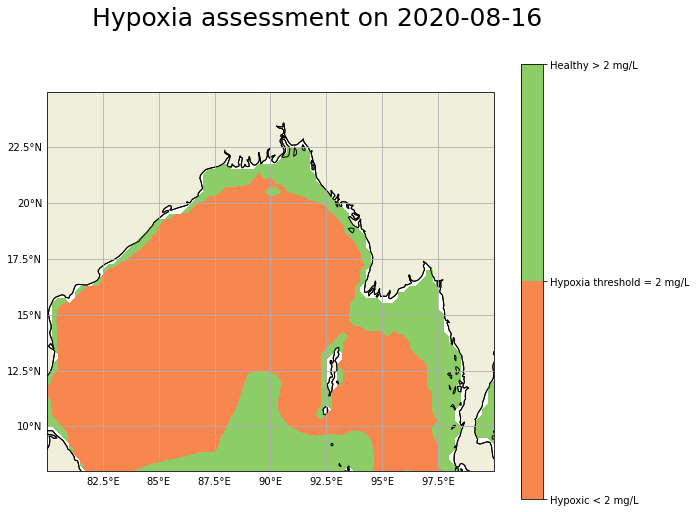

In [15]:
# Define the date to display
date = '2020-08-16'

# Select the model oxygen variable at this date
o2_min_date = o2_min.sel(time=date).squeeze().o2

# Define the characteristics of the plot
f = plt.figure(figsize=(10, 8))                                                    # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map
ax.coastlines()                                                                    # add the coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
gl.right_labels = False                                                            # remove latitude labels on the right
gl.top_labels = False                                                              # remove longitude labels on the top
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                             # add land mask
ax.set_extent([80, 100, 8, 25],crs=ccrs.PlateCarree())                             # define the extent of the map [lon_min,lon_max,lat_min,lat_max]

# Plot the sea surface temperature, set the min/max values of the colorbar and the colormap to use
# im = ax.pcolor(o2_2005_2014['longitude'].data, o2_2005_2014['latitude'].data,o2_2005_2014,shading='nearest',cmap='plasma')
#im = ax.pcolor(o2_min['longitude'].data, o2_min['latitude'].data,o2_min,shading='nearest',cmap='plasma')
im = ax.contourf(o2_min_date['longitude'].data, o2_min_date['latitude'].data,o2_min_date,[-10,2,15],cmap='RdYlGn')

# Add the titles and legend
f.suptitle('Hypoxia assessment on ' + date ,fontsize=25)                           # add a title to the figure
cbar = f.colorbar(im,ax=ax)                                                        # add the colorbar
cbar.ax.set_yticklabels(['Hypoxic < 2 mg/L', 'Hypoxia threshold = 2 mg/L', 'Healthy > 2 mg/L'])                     # add the labels of the colorbar

## Analyse hypoxia evolution

The last steps of our study will be to calculate the area of our sub-region that is affected by hypoxia. For each year, we will state that a pixel of the model is hypoxic if the average of the bottom oxygen concentration, over the year, is below the threshold of 2mg/L. Note that this criterion is just a suggestion and some other ones, such as the median oxygen value over the year, may also be relevant.

To do this study, we will be using the functions [`xarray.where`](https://xarray.pydata.org/en/stable/generated/xarray.where.html) to apply a filter on the regions where the bottom oxygen is below the threshold, and [`xarray.count`](https://xarray.pydata.org/en/stable/generated/xarray.DataArray.count.html) to calculate the number of pixels which pass the filter. Knowing that the spatial resolution of the model is 4 km x 4 km, each pixel has an area of 16 km² ! 


In the following cell, we are going group the `o2_min` Python variable by year, like we did in before, We will then make a loop on each year and see the how hypoxia has evolved in the Bay of Bengal over the 28 last years.

<BarContainer object of 27 artists>

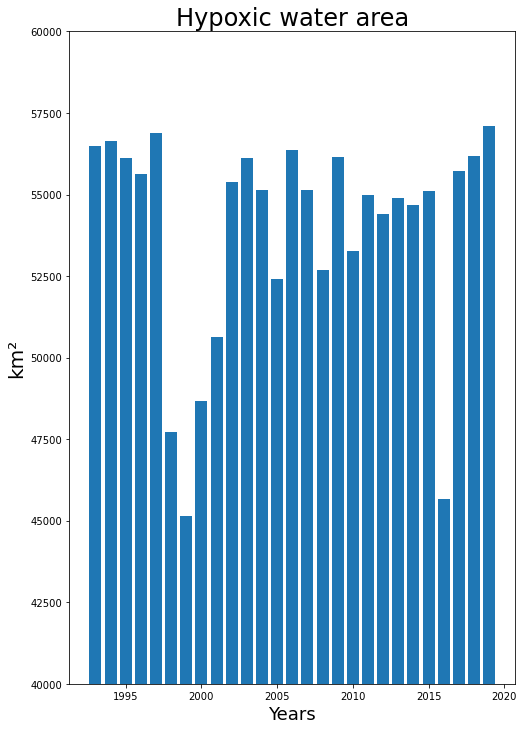

In [17]:
# Calculate the yearly average
o2_min_year = o2_min.groupby('time.year').mean('time')

# Initialize the lists to be ploted
years = []
areas = []

# Loop on the years
for year in range(1993,2020):
    o2_min_year_date = o2_min_year.sel(year=year)             # Select the year
    area = o2_min_year_date.o2.where(o2_min_year_date<2).count().o2 * 16      # Calculate the area
    areas.append(float(area))
    years.append(year)

# Define the characteristics of the plot
f = plt.figure(figsize=(8,12))                                # create a figure and define its size
ax = f.add_subplot(111)                                       # create the axes of the plot
ax.set_title("Hypoxic water area",fontsize=24)                     # add the figure title
ax.set_xlabel("Years",fontsize=18)                        # set x axis label
ax.set_ylabel("km²",fontsize=20)                               # set y axis label 
ax.set_ylim(ymin=40000, ymax=60000)

# Plot the bar charts 
ax.bar(years,areas)

<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### And thank you for your attention! :) 


